In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/EGCO603 Data Mining/'

In [ ]:
customer = pd.read_csv(path+'customers.csv')
order = pd.read_csv(path+'orders.csv')
product = pd.read_csv(path+'products.csv')
sale = pd.read_csv(path+'sales.csv')

**How many missing do we have ?**

In [ ]:
customer_missing = customer.isnull().sum()
order_missing = order.isnull().sum()
product_missing = product.isnull().sum()
sale_missing = sale.isnull().sum()

print("Customer Missing Values:\n", customer_missing)
print("\nOrder Missing Values:\n", order_missing)
print("\nProduct Missing Values:\n", product_missing)
print("\nSale Missing Values:\n", sale_missing)

Customer Missing Values:
 customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

Order Missing Values:
 order_id         0
customer_id      0
payment          0
order_date       0
delivery_date    0
dtype: int64

Product Missing Values:
 product_id      0
product_type    0
product_name    0
size            0
colour          0
price           0
quantity        0
description     0
dtype: int64

Sale Missing Values:
 sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64


**Merging data**

In [ ]:
# Merge
merged_df = pd.merge(customer, order, on='customer_id')
merged_df

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,payment,order_date,delivery_date
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,455,24550,2021-4-4,2021-04-06
1,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,670,10246,2021-3-6,2021-04-01
2,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,729,35593,2021-2-18,2021-03-01
3,7,Winslow Ewbanck,Bigender,76,92 Hills Station StApt. 683,793,Masonfurt,Queensland,Australia,465,48935,2021-5-21,2021-05-23
4,10,Susanetta Wilshin,Bigender,70,615 Hayley KnollSuite 454,2118,Joelburgh,Western Australia,Australia,595,45626,2021-3-9,2021-03-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,286,18840,2021-1-5,2021-01-08
996,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,404,45215,2021-3-3,2021-03-09
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,586,15870,2021-2-27,2021-03-22
998,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,773,21349,2021-7-19,2021-08-07


In [ ]:
merged_df.to_csv('merged_data.csv', index=False)

In [ ]:
merged_df_1 = pd.merge(merged_df, sale, on='order_id')
merged_df_2 = pd.merge(merged_df_1, product, on='product_id')


In [ ]:
merged_df_1.to_csv('merged_data1.csv', index=False)

In [ ]:
merged_df_2.to_csv('merged_data2.csv', index=False)

**Group by customer id**

In [ ]:

customer_analysis = merged_df_2.groupby('customer_id').agg({
    'total_price': 'sum',
    'product_type': lambda x: x.value_counts().idxmax(),
    'price': 'mean',
    'quantity_x': 'sum',
    'gender': 'first',
    'age': 'first',
}).reset_index()


customer_analysis.columns = ['CustomerID', 'TotalSpending', 'MostPurchasedProduct', 'AveragePrice', 'TotalItemsBought', 'Gender', 'Age']
print(customer_analysis)


     CustomerID  TotalSpending MostPurchasedProduct  AveragePrice  \
0             1           1641               Jacket    112.125000   
1             7           1017             Trousers    101.800000   
2            10            270             Trousers     95.000000   
3            11            382                Shirt    103.000000   
4            12           1551               Jacket    108.000000   
..          ...            ...                  ...           ...   
611         994           1716                Shirt    111.285714   
612         995           2140                Shirt    110.800000   
613         996           3045               Jacket    106.307692   
614         998           4415               Jacket    104.904762   
615        1000           1483             Trousers    102.166667   

     TotalItemsBought      Gender  Age  
0                  17      Female   30  
1                   9    Bigender   76  
2                   3    Bigender   70  
3      

In [ ]:
# merge by customer to see Total spending
customer_analysis.to_csv('customer_analysis.csv', index=False)

In [ ]:
customer_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            616 non-null    int64  
 1   TotalSpending         616 non-null    int64  
 2   MostPurchasedProduct  616 non-null    object 
 3   AveragePrice          616 non-null    float64
 4   TotalItemsBought      616 non-null    int64  
 5   Gender                616 non-null    object 
 6   Age                   616 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 33.8+ KB


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1260 non-null   int64 
 1   product_type  1260 non-null   object
 2   product_name  1260 non-null   object
 3   size          1260 non-null   object
 4   colour        1260 non-null   object
 5   price         1260 non-null   int64 
 6   quantity      1260 non-null   int64 
 7   description   1260 non-null   object
dtypes: int64(3), object(5)
memory usage: 78.9+ KB


**Check uniqueness Categorical Variables**

In [ ]:
categorical = customer.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {customer[cat_col].nunique()} uniqueness variable(s)")

customer_name : 1000 uniqueness variable(s)
gender : 8 uniqueness variable(s)
home_address : 1000 uniqueness variable(s)
city : 961 uniqueness variable(s)
state : 8 uniqueness variable(s)
country : 1 uniqueness variable(s)


In [ ]:
categorical = order.select_dtypes(["category", "int"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {order[cat_col].nunique()} uniqueness variable(s)")

order_id : 1000 uniqueness variable(s)
customer_id : 617 uniqueness variable(s)
payment : 995 uniqueness variable(s)


In [ ]:
categorical = product.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {product[cat_col].nunique()} uniqueness variable(s)")

product_type : 3 uniqueness variable(s)
product_name : 35 uniqueness variable(s)
size : 5 uniqueness variable(s)
colour : 7 uniqueness variable(s)
description : 1260 uniqueness variable(s)


In [ ]:
categorical = sale.select_dtypes(["category", "int"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {sale[cat_col].nunique()} uniqueness variable(s)")

sales_id : 5000 uniqueness variable(s)
order_id : 993 uniqueness variable(s)
product_id : 1233 uniqueness variable(s)
price_per_unit : 23 uniqueness variable(s)
quantity : 3 uniqueness variable(s)
total_price : 69 uniqueness variable(s)


In [ ]:
categorical = customer_analysis.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {customer_analysis[cat_col].nunique()} uniqueness variable(s)")

MostPurchasedProduct : 3 uniqueness variable(s)
Gender : 8 uniqueness variable(s)


In [ ]:
categorical = customer_analysis.select_dtypes(["category", "int64"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {customer_analysis[cat_col].nunique()} uniqueness variable(s)")

CustomerID : 616 uniqueness variable(s)
TotalSpending : 560 uniqueness variable(s)
TotalItemsBought : 51 uniqueness variable(s)
Age : 61 uniqueness variable(s)


**Recap Data**


*   customer_name :  1000 uniqueness variable(s)
*   gender :  8 uniqueness variable(s)
*   home_address :  1000 uniqueness variable(s)
*   city :  961 uniqueness variable(s)
*   state :  8 uniqueness variable(s)
*   product_type : 3 uniqueness variable(s)
*   product_name : 35 uniqueness variable(s)
*   size : 5 uniqueness variable(s)
*   colour : 7 uniqueness variable(s)
*   CustomerID_purchased : 616 uniqueness variable(s)
*   sales_id : 5000 uniqueness variable(s)
*   order_id : 993 uniqueness variable(s)












In [ ]:
merged_df_2['order_date'] = pd.to_datetime(merged_df_2['order_date'])
merged_df_2['year_order'] = merged_df_2['order_date'].dt.year
merged_df_2['month_order'] = merged_df_2['order_date'].dt.month
merged_df_2['day_order'] = merged_df_2['order_date'].dt.day
merged_df_2['day_of_week'] = merged_df_2['order_date'].dt.day_name()
merged_df_2.head()



,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,product_name,size,colour,price,quantity_y,description,year_order,month_order,day_order,day_of_week
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,455,...,Chambray,S,red,105,72,"A red coloured, S sized, Chambray Shirt",2021,4,4,Sunday
1,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,455,...,Pullover,L,yellow,114,43,"A yellow coloured, L sized, Pullover Jacket",2021,4,4,Sunday
2,81,Lanny Wardale,Female,30,4870 Jackson SummitApt. 538,1915,Spencerborough,Western Australia,Australia,863,...,Pullover,L,yellow,114,43,"A yellow coloured, L sized, Pullover Jacket",2021,5,10,Monday
3,258,Mira Heinonen,Female,62,2719 Dietrich KnollApt. 175,1252,South Declan,Queensland,Australia,793,...,Pullover,L,yellow,114,43,"A yellow coloured, L sized, Pullover Jacket",2021,1,27,Wednesday
4,432,Ettie Gonnely,Bigender,34,6172 Andrew AvenueApt. 194,7029,North Cody,Victoria,Australia,939,...,Pullover,L,yellow,114,43,"A yellow coloured, L sized, Pullover Jacket",2021,4,2,Friday


In [ ]:
merged_df_2.to_csv('merged_data3.csv', index=False)

**Data Analysis**

In [ ]:
merged_df_3 = pd.read_csv(path+'merged_data4.csv')

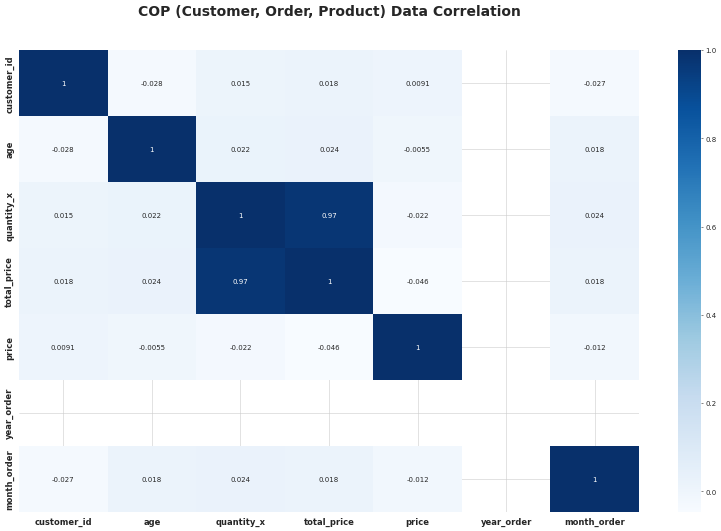

In [ ]:
sns.set_style("whitegrid") # set the seaborn style
# let's make a correlation matrix for `cop_data`
fig = plt.figure(dpi=50, figsize=(20, 12)) # figure the size
sns.heatmap(merged_df_3.corr(), annot=True, cmap="Blues") # create a heatmap
plt.title("COP (Customer, Order, Product) Data Correlation", weight="bold", fontsize=20, pad=50) # title
plt.xticks(weight="bold", fontsize=12) # x-ticks
plt.yticks(weight="bold", fontsize=12); # y-ticks

warnings.simplefilter(action="ignore", category=FutureWarning)


In [ ]:
def univariate_analysis(data, color, title1, title2):

    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(10, 4) # set the width and high
    )

    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )

    ax1.set_title( # set the title 1
        title1,
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=15, # font-size
        pad=30 # padding
    )

    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line
    )

    ax2.set_title( # set the title 2
        title2,
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=15, # font-size
        pad=30 # padding
    )

    return fig # returning the figure

In [ ]:
# Group by order_id

aggregated_df = merged_df_2.groupby('order_id').agg({
    'customer_id': 'first',
    'customer_name': 'first',
    'gender': 'first',
    'age': 'first',
    'home_address': 'first',
    'zip_code': 'first',
    'city': 'first',
    'state': 'first',
    'country': 'first',
    'payment': 'first',
    'order_date': 'first',
    'delivery_date': 'first',
    'sales_id': 'first',
    'product_id': 'first',
    'price_per_unit': 'first',
    'quantity_x': 'sum',
    'total_price': 'sum',
    'product_type': 'first',
    'product_name': 'first',
    'size': 'first',
    'colour': 'first',
    'price': 'first',
    'quantity_y': 'sum',
    'description': 'first',
    'year_order': 'first',
    'month_order': 'first',
    'day_order': 'first',
    'day_of_week': 'first'
}).reset_index()

# Print or display the result
# print(aggregated_df)



In [ ]:
aggregated_df.to_csv('aggregate.csv', index=False)

In [ ]:
aggregate_order_id = pd.read_csv(path+'aggregate.csv')

<ipython-input-13-8738324f4b12>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( # create a distplot visualization


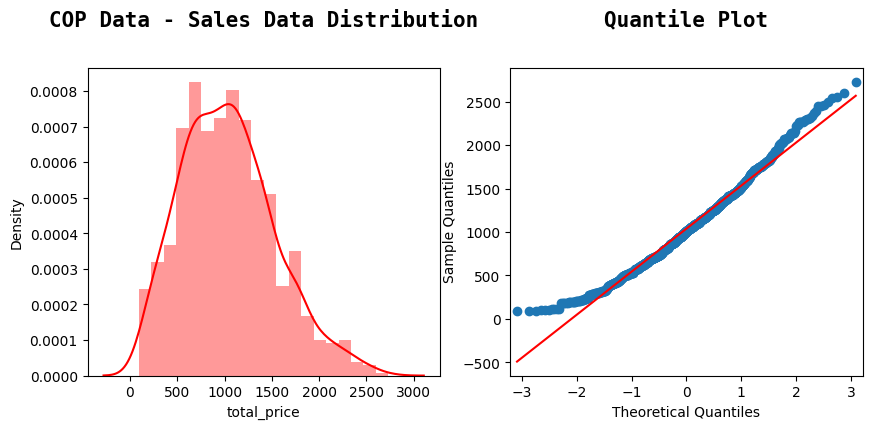

In [ ]:
# total purchase per transantion
univariate_analysis(
    data=aggregate_order_id['total_price'],
    color='red', # pick the color
    title1='COP Data - Sales Data Distribution', # title1
    title2='Quantile Plot'); # title2

**Sale**





At least  75% of the Shopping Cart Database Sales customer population in Australia has sales ranging in one transection from 47.34 to 2030 (Australian Dollars).

In [ ]:
def cal_mean_var(input):
  mean = input.mean()
  std = input.std()

  upper_range = mean- 2*std
  lower_range = mean + 2*std
  print('mean :', mean)
  print('sd :', std)
  print('upper_range :', upper_range)
  print('lower_range :', lower_range)

  return mean,std,upper_range,lower_range


In [ ]:
cal_mean_var(aggregate_order_id['total_price'])

mean : 1039.0735146022155
sd : 495.8634734560484
upper_range : 47.34656769011872
lower_range : 2030.8004615143122


(1039.0735146022155, 495.8634734560484, 47.34656769011872, 2030.8004615143122)

<ipython-input-13-8738324f4b12>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( # create a distplot visualization


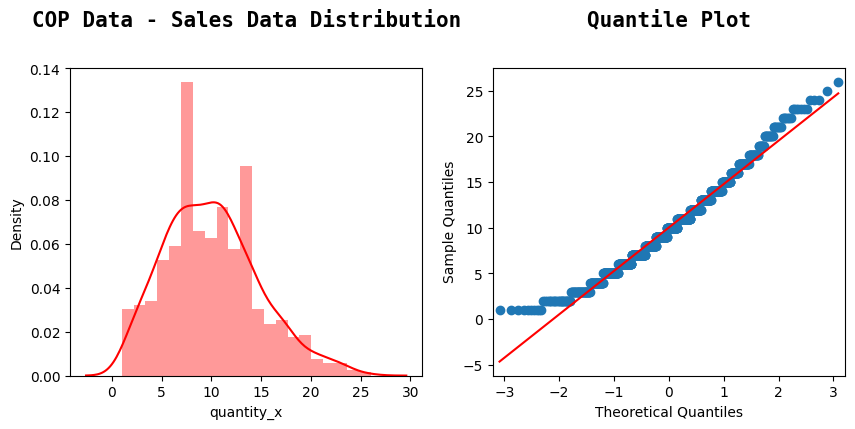

In [ ]:
univariate_analysis(
    data=aggregate_order_id['quantity_x'],
    color='red', # pick the color
    title1='COP Data - Sales Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [ ]:
cal_mean_var(aggregate_order_id['quantity_x'])

mean : 10.032225579053373
sd : 4.754133259158497
upper_range : 0.5239590607363791
lower_range : 19.540492097370368


(10.032225579053373, 4.754133259158497, 0.5239590607363791, 19.540492097370368)

**Quantity**

At least  75% of the Shopping Cart Database customer population in Australia has an quantity range from 1−19 quantity per ordered

<ipython-input-13-8738324f4b12>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( # create a distplot visualization


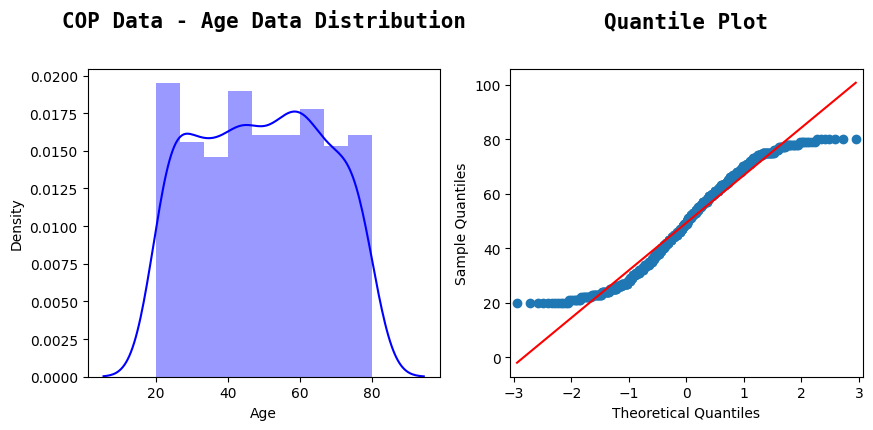

In [ ]:
univariate_analysis( # call the function
    data=customer_analysis['Age'], # put the data
    color='blue', # pick the color
    title1='COP Data - Age Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [ ]:
cal_mean_var(customer_analysis['Age'])

mean : 49.342532467532465
sd : 17.44495294260423
upper_range : 14.452626582324008
lower_range : 84.23243835274093


(49.342532467532465, 17.44495294260423, 14.452626582324008, 84.23243835274093)

**Age**

At least  75% of the Shopping Cart Database customer population in Australia has an age range of  14−84 years

# **Data Visualize**

**Age range**

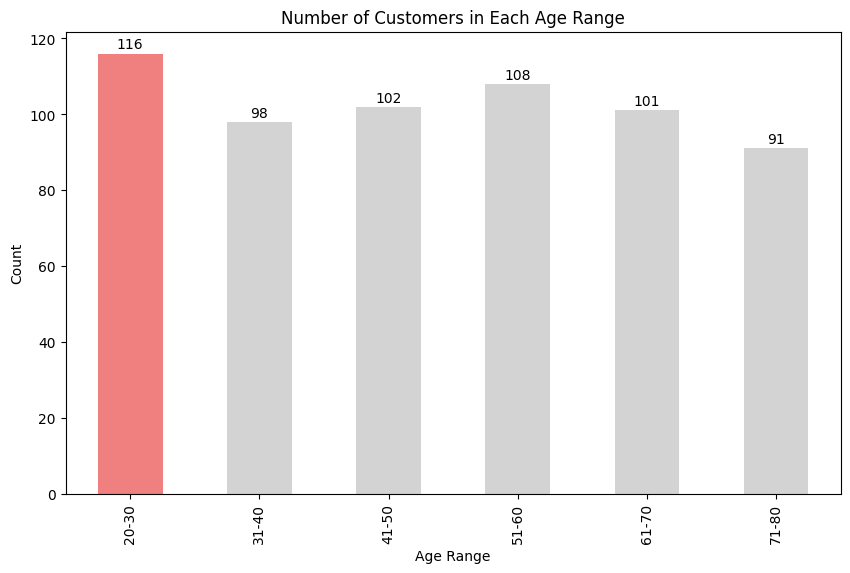

In [ ]:
age_ranges = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column 'AgeRange' based on the specified age ranges
customer_analysis['AgeRange'] = pd.cut(customer_analysis['Age'], bins=[0, 30, 40, 50, 60, 70, 80], labels=age_ranges, right=True)

# Count the occurrences of each age range
age_count = customer_analysis['AgeRange'].value_counts()

# Find the age range with the highest count
max_age_range = age_count.idxmax()

# Create a color list with 'skyblue' for the second bar, 'lightgray' for others, and 'lightcoral' for the highest
colors = ['lightgray' if age_range != max_age_range else 'lightcoral' for age_range in age_count.index]

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = age_count.sort_index().plot(kind='bar', color=colors)

# Add labels and title
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of Customers in Each Age Range')

# Add count labels on each bar
for i, v in enumerate(age_count.sort_index()):
    count_label = f'{v}'
    ax.text(i, v + 0.5, f'{count_label}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()


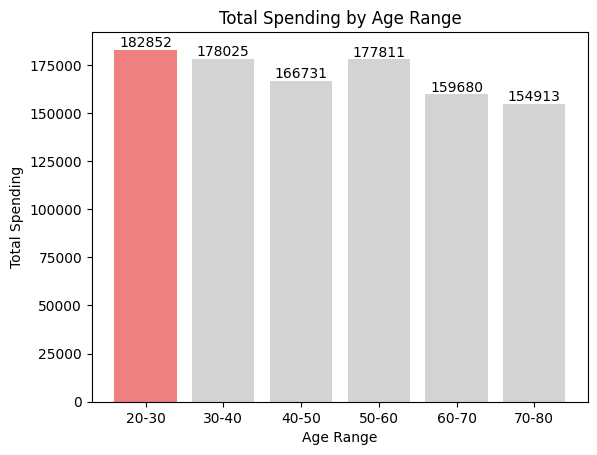

In [ ]:

age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# Create Age Range column
customer_analysis['AgeRange'] = pd.cut(customer_analysis['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Age Range and calculate Total Spending
grouped_data = customer_analysis.groupby('AgeRange')['TotalSpending'].sum().reset_index()

# Find the index of the highest total spending
max_index = grouped_data['TotalSpending'].idxmax()

# Set colors
colors = ['lightgray'] * len(grouped_data)
colors[max_index] = 'lightcoral'

# Plotting
plt.bar(grouped_data['AgeRange'], grouped_data['TotalSpending'], color=colors)
plt.xlabel('Age Range')
plt.ylabel('Total Spending')
plt.title('Total Spending by Age Range')

# Add labels to the bars
for i, value in enumerate(grouped_data['TotalSpending']):
    plt.text(i, value, str(value), ha='center', va='bottom', color='black')

plt.show()


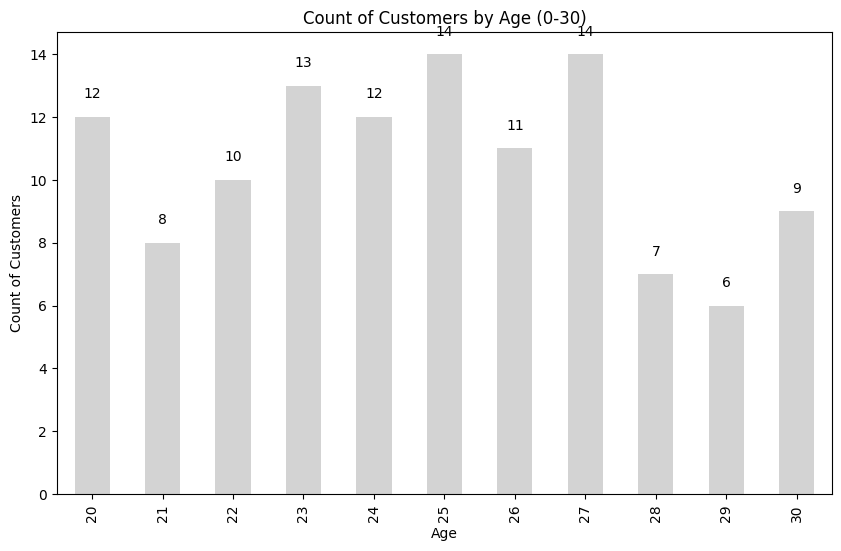

In [ ]:
# Filter data for customers with age between 0 and 30
filtered_data = customer_analysis[(customer_analysis['Age'] >= 0) & (customer_analysis['Age'] <= 30)]

# Count the occurrences of each age
age_count = filtered_data['Age'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = age_count.plot(kind='bar', color='lightgray')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count of Customers')
plt.title('Count of Customers by Age (0-30)')

# Add count labels on each bar
for i, v in enumerate(age_count):
    count_label = f'{v}'
    ax.text(i, v + 0.5, f'{count_label}', ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()


**Gender**

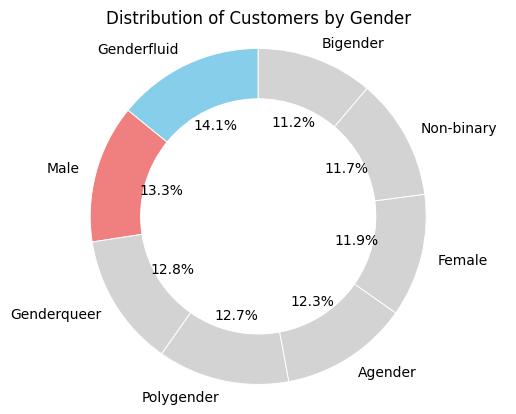

In [ ]:
gender_counts = customer_analysis['Gender'].value_counts()
colors = ['skyblue', 'lightcoral']

colors.extend(['lightgray'] * (len(gender_counts) - 2))
bold_wedge = 0

# Create a donut chart
fig, ax = plt.subplots()

# Plot the donut chart with a specific wedge being bolder
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3, linewidth=1.5 if bold_wedge == i else 0.7, edgecolor='white'), colors=colors)

# Draw a circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

plt.title('Distribution of Customers by Gender')
plt.show()


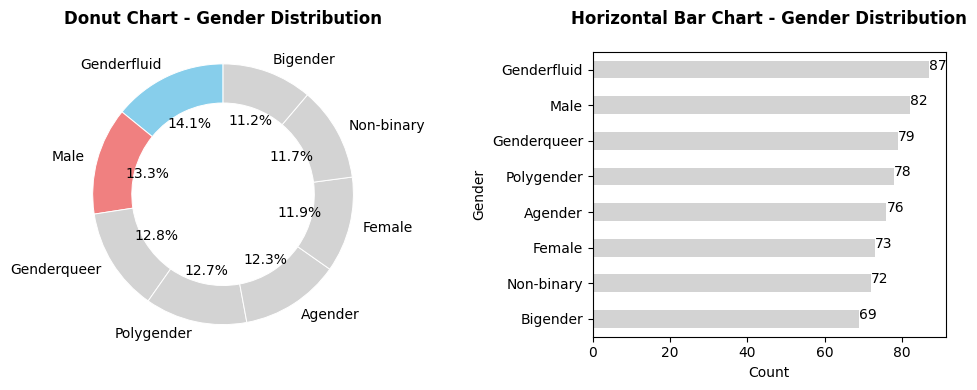

In [ ]:
gender_counts = customer_analysis['Gender'].value_counts()


colors_donut = ['skyblue', 'lightcoral']
colors_donut.extend(['lightgray'] * (len(gender_counts) - 2))

# Define which wedge to make bolder (e.g., the first one)
bold_wedge = 0


fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3, linewidth=1.5 if bold_wedge == i else 0.7, edgecolor='white'), colors=colors_donut)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
axs[0].axis('equal')
axs[0].set_title('Donut Chart - Gender Distribution', pad=20,weight="bold")  # Add padding to the title

# Space between the two charts
fig.subplots_adjust(wspace=0.5)  # Adjust the width space between subplots

# Horizontal bar chart
gender_counts.sort_values().plot(kind='barh', color='lightgray', ax=axs[1])

axs[1].set_xlabel('Count')
axs[1].set_ylabel('Gender')
axs[1].set_title('Horizontal Bar Chart - Gender Distribution', pad=20, weight="bold")  # Add padding to the title

# Display the counts on the bars
for index, value in enumerate(gender_counts.sort_values()):
    axs[1].text(value, index, str(value))


plt.tight_layout()
plt.show()


In [ ]:
merged_df_2['total_price'] = pd.to_numeric(merged_df_2['total_price'], errors='coerce')

# Extract month from the 'order_date' and convert it to month names
merged_df_2['month_name'] = pd.to_datetime(merged_df_2['order_date']).dt.month.apply(lambda x: calendar.month_name[x])

# Create a Categorical data type with the desired order
month_order = pd.CategoricalDtype(categories=list(calendar.month_name)[1:], ordered=True)
merged_df_2['month_name'] = merged_df_2['month_name'].astype(month_order)

# Group by month name and sum the total prices
monthly_total_price = merged_df_2.groupby('month_name')['total_price'].sum()

# Calculate the average total price
average_total_price = monthly_total_price.loc['January':'October'].mean()

# Find the month with the highest total price
max_month = monthly_total_price.idxmax()

# Create a color list with a different color for the highest bar
colors = ['lightgray' if month != max_month else 'lightcoral' for month in monthly_total_price.index]

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
ax = monthly_total_price.plot(kind='bar', color=colors)

# Add labels with the total price on each bar
for i, total_price in enumerate(monthly_total_price.values):
    ax.text(i, total_price + 100, f'${total_price:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Add an average line with label
ax.axhline(average_total_price, color='red', linestyle='dashed', linewidth=2, label=f'Average (${average_total_price:.2f})')

plt.xlabel('Month')
plt.ylabel('Total Price')
plt.title('Total Price by Month (Sorted)')

plt.legend()
plt.show()


NameError: ignored

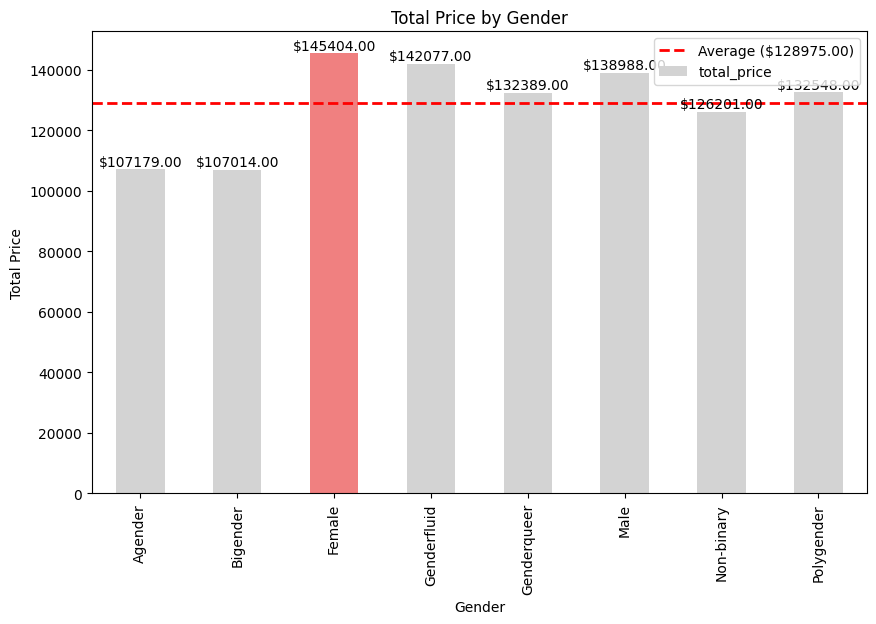

In [ ]:
# Group by gender and sum the total prices
gender_total_price = merged_df_2.groupby('gender')['total_price'].sum()

# Calculate the average total price
average_total_price = gender_total_price.mean()

# Find the gender with the highest total price
max_gender = gender_total_price.idxmax()

# Create a color list with a different color for the highest bar
colors = ['lightgray' if gender != max_gender else 'lightcoral' for gender in gender_total_price.index]

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
ax = gender_total_price.plot(kind='bar', color=colors)

# Add labels with the total price on each bar
for i, total_price in enumerate(gender_total_price.values):
    ax.text(i, total_price + 100, f'${total_price:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Add an average line with label
ax.axhline(average_total_price, color='red', linestyle='dashed', linewidth=2, label=f'Average (${average_total_price:.2f})')

plt.xlabel('Gender')
plt.ylabel('Total Price')
plt.title('Total Price by Gender')

plt.legend()
plt.show()


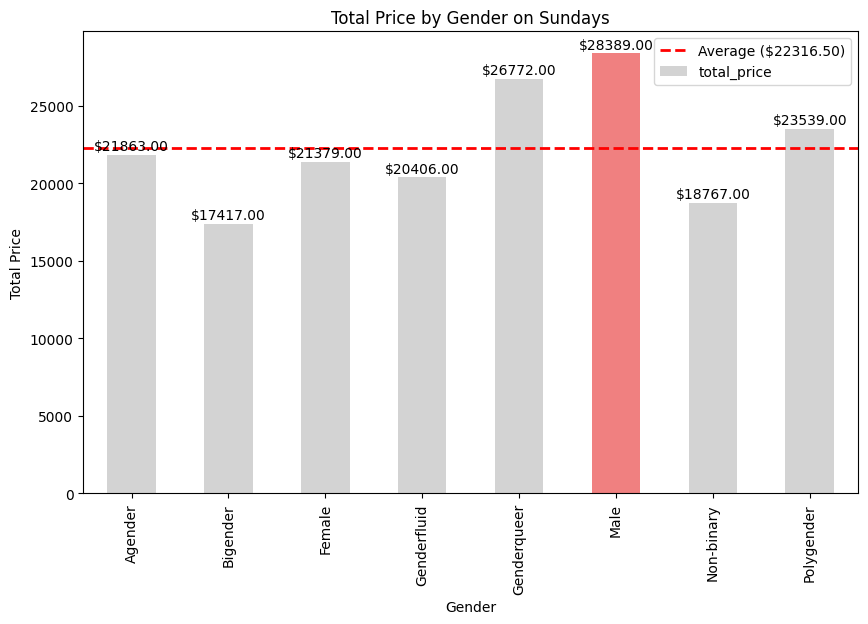

In [ ]:
# Filter data for Sundays only
sunday_data = merged_df_2[merged_df_2['day_of_week'] == 'Sunday']

# Group by gender and sum the total prices for Sundays
gender_total_price_sunday = sunday_data.groupby('gender')['total_price'].sum()

# Calculate the average total price for Sundays
average_total_price_sunday = gender_total_price_sunday.mean()

# Find the gender with the highest total price for Sundays
max_gender_sunday = gender_total_price_sunday.idxmax()

# Create a color list with a different color for the highest bar
colors_sunday = ['lightgray' if gender != max_gender_sunday else 'lightcoral' for gender in gender_total_price_sunday.index]

# Create a vertical bar plot for Sundays
plt.figure(figsize=(10, 6))
ax = gender_total_price_sunday.plot(kind='bar', color=colors_sunday)

# Add labels with the total price on each bar for Sundays
for i, total_price_sunday in enumerate(gender_total_price_sunday.values):
    ax.text(i, total_price_sunday + 100, f'${total_price_sunday:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Add an average line with label for Sundays
ax.axhline(average_total_price_sunday, color='red', linestyle='dashed', linewidth=2, label=f'Average (${average_total_price_sunday:.2f})')

plt.xlabel('Gender')
plt.ylabel('Total Price')
plt.title('Total Price by Gender on Sundays')

plt.legend()
plt.show()


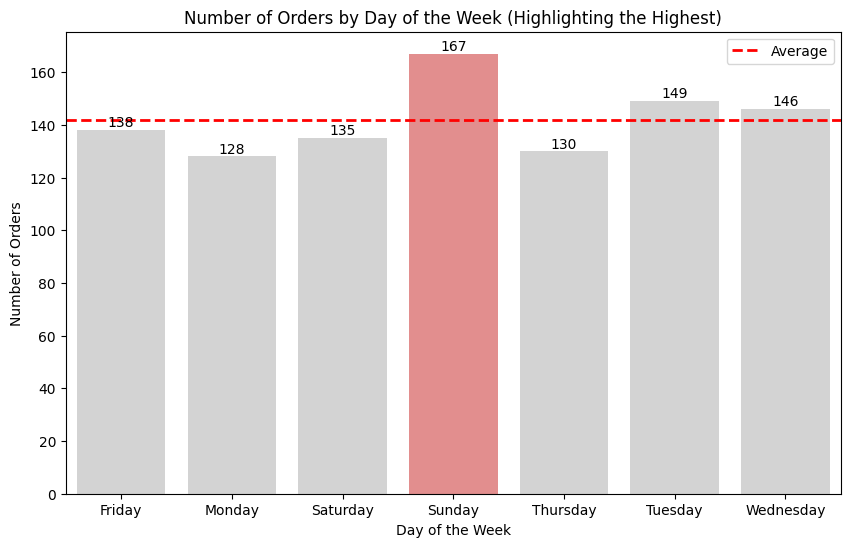

In [ ]:
daily_order_count = aggregate_order_id['order_id'].groupby(aggregate_order_id['day_of_week']).count()

# Find the day with the highest order count
max_day = daily_order_count.idxmax()

# Calculate the average order count
average_order_count = daily_order_count.mean()

# Create a color list with the same color for all days except the highest
colors = ['lightgray' if day != max_day else 'lightcoral' for day in daily_order_count.index]

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=daily_order_count.index, y=daily_order_count.values, palette=colors)

# Add labels with the count of orders on each bar
for i, count in enumerate(daily_order_count.values):
    ax.text(i, count + 0.1, f'{count}', ha='center', va='bottom', fontsize=10, color='black')

# Add an average line
ax.axhline(average_order_count, color='red', linestyle='dashed', linewidth=2, label='Average')


plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of the Week (Highlighting the Highest)')

plt.legend()
plt.show()


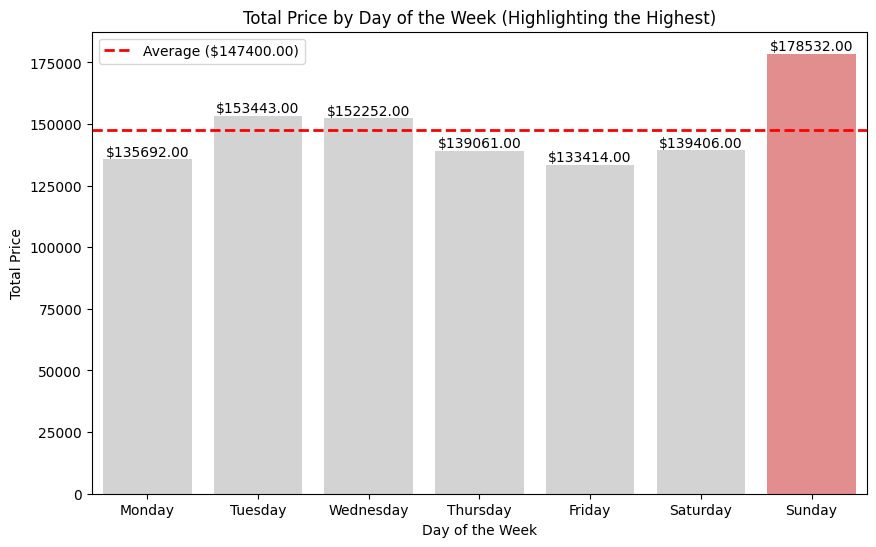

In [ ]:
merged_df_2['total_price'] = pd.to_numeric(merged_df_2['total_price'], errors='coerce')

# Group by day_of_week and sum the total prices
daily_total_price = merged_df_2.groupby('day_of_week')['total_price'].sum()

# Sort days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_total_price = daily_total_price.reindex(day_order)

# Find the day with the highest total price
max_day = daily_total_price.idxmax()

# Calculate the average total price
average_total_price = daily_total_price.mean()

# Create a color list with the same color for all days except the highest
colors = ['lightgray' if day != max_day else 'lightcoral' for day in daily_total_price.index]

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=daily_total_price.index, y=daily_total_price.values, palette=colors)

# Add labels with the total price on each bar
for i, total_price in enumerate(daily_total_price.values):
    ax.text(i, total_price + 100, f'${total_price:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Add an average line with label
ax.axhline(average_total_price, color='red', linestyle='dashed', linewidth=2, label=f'Average (${average_total_price:.2f})')

plt.xlabel('Day of the Week')
plt.ylabel('Total Price')
plt.title('Total Price by Day of the Week (Highlighting the Highest)')

plt.legend()
plt.show()


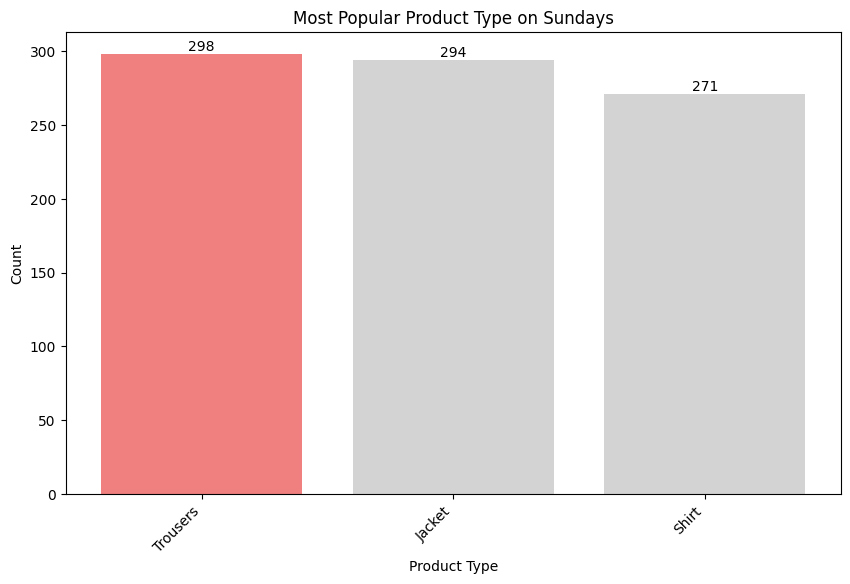

In [ ]:
sunday_data = merged_df_2[merged_df_2['day_of_week'] == 'Sunday']

# Count occurrences of each product type on Sundays
product_type_counts = sunday_data['product_type'].value_counts()

# Determine the color for each product type
colors = ['lightcoral' if product_type == product_type_counts.idxmax() else 'lightgray' for product_type in product_type_counts.index]

# Plot the count of each product type
plt.figure(figsize=(10, 6))
plt.bar(product_type_counts.index, product_type_counts, color=colors)
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Most Popular Product Type on Sundays')
plt.xticks(rotation=45, ha='right')

# Add labels on each bar
for i, count in enumerate(product_type_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()


<ipython-input-37-3b8ee0419f35>:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  centre_circle = plt.Circle((0, 0), 0.2, color='white', edgecolor='black', linewidth=0.7)


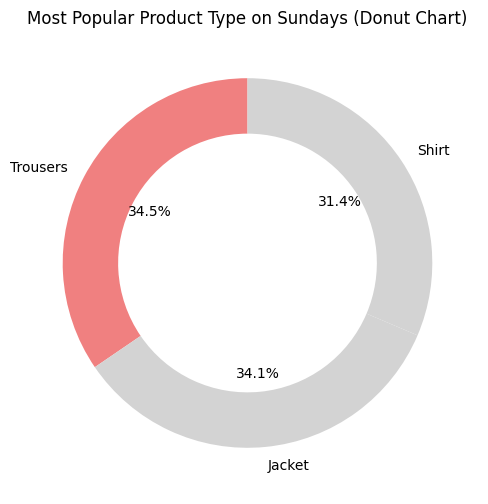

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each product type on Sundays
product_type_counts = sunday_data['product_type'].value_counts()

# Determine the color for each product type
colors = ['lightcoral' if product_type == product_type_counts.idxmax() else 'lightgray' for product_type in product_type_counts.index]

# Create a donut chart
plt.figure(figsize=(10, 6))
plt.pie(product_type_counts, labels=product_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.2, color='white', edgecolor='black', linewidth=0.7)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Most Popular Product Type on Sundays (Donut Chart)')
plt.show()


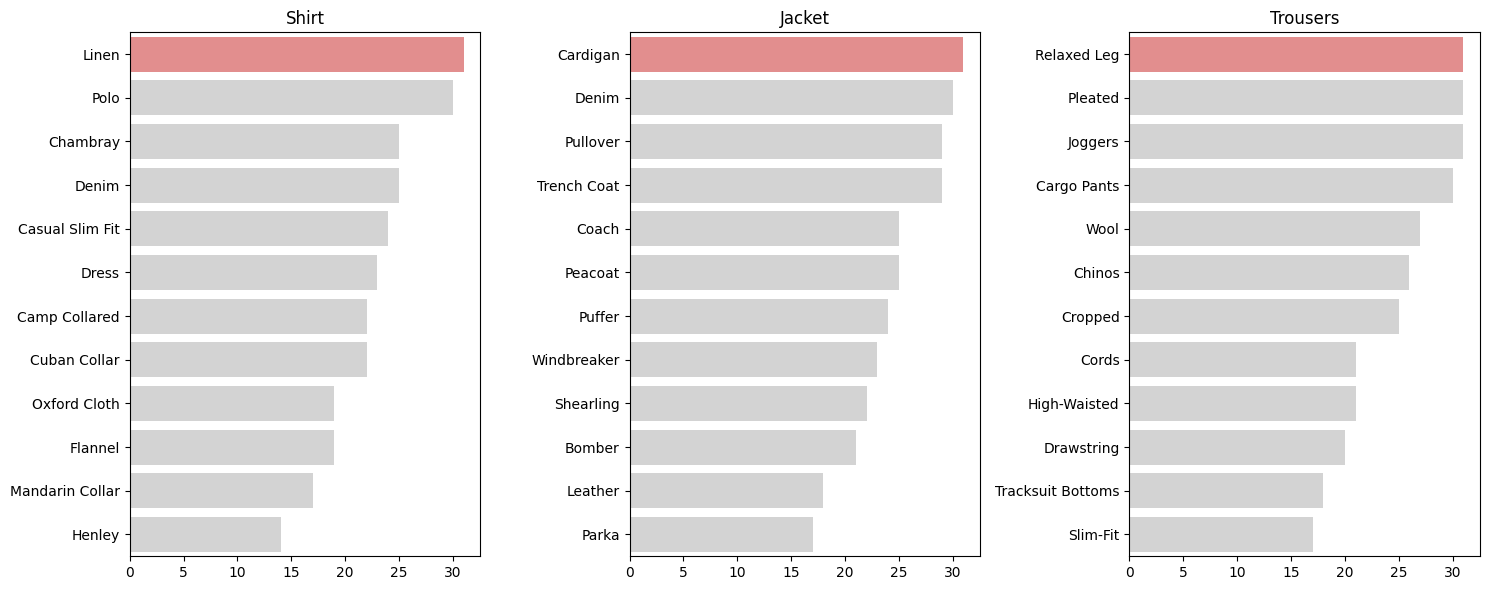

In [ ]:
sunday_data = merged_df_2[merged_df_2['day_of_week'] == 'Sunday']

# Get unique product types
product_types = sunday_data['product_type'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(product_types), figsize=(15, 6))

# Set a common color palette for all charts
colors = sns.color_palette("pastel")

# Create a separate horizontal bar chart for each product type
for i, product_type in enumerate(product_types):
    # Filter data for the specific product type
    subset = sunday_data[sunday_data['product_type'] == product_type]

    # Count occurrences of each product name
    product_counts = subset['product_name'].value_counts()

    # Determine the color for each product
    product_colors = ['lightcoral' if product == product_counts.idxmax() else 'lightgray' for product in product_counts.index]

    # Create a horizontal bar chart
    plt.subplot(1, len(product_types), i + 1)
    sns.barplot(x=product_counts.values, y=product_counts.index, palette=product_colors)

    plt.title(f'{product_type}')

plt.tight_layout()

plt.show()


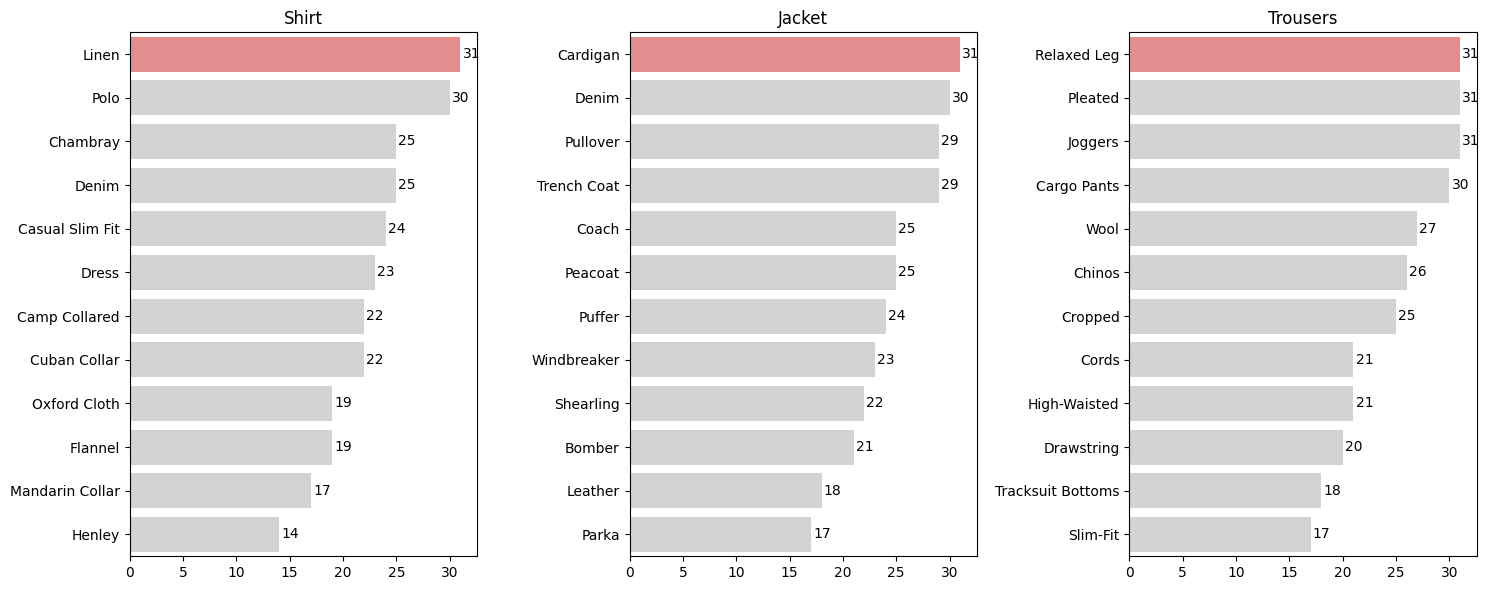

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'product_name' and 'product_type' are columns in merged_df_2
sunday_data = merged_df_2[merged_df_2['day_of_week'] == 'Sunday']

# Get unique product types
product_types = sunday_data['product_type'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(product_types), figsize=(15, 6))

# Set a common color palette for all charts
colors = sns.color_palette("pastel")

# Create a separate horizontal bar chart for each product type
for i, product_type in enumerate(product_types):
    # Filter data for the specific product type
    subset = sunday_data[sunday_data['product_type'] == product_type]

    # Count occurrences of each product name
    product_counts = subset['product_name'].value_counts()

    # Determine the color for each product
    product_colors = ['lightcoral' if product == product_counts.idxmax() else 'lightgray' for product in product_counts.index]

    # Create a horizontal bar chart
    ax = sns.barplot(x=product_counts.values, y=product_counts.index, palette=product_colors, ax=axes[i])

    # Add data labels on each bar
    for p, label in zip(ax.patches, product_counts.values):
        ax.annotate(f'{label}', (p.get_x() + p.get_width() + 0.2, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    ax.set_title(f'{product_type}')

plt.tight_layout()
plt.show()


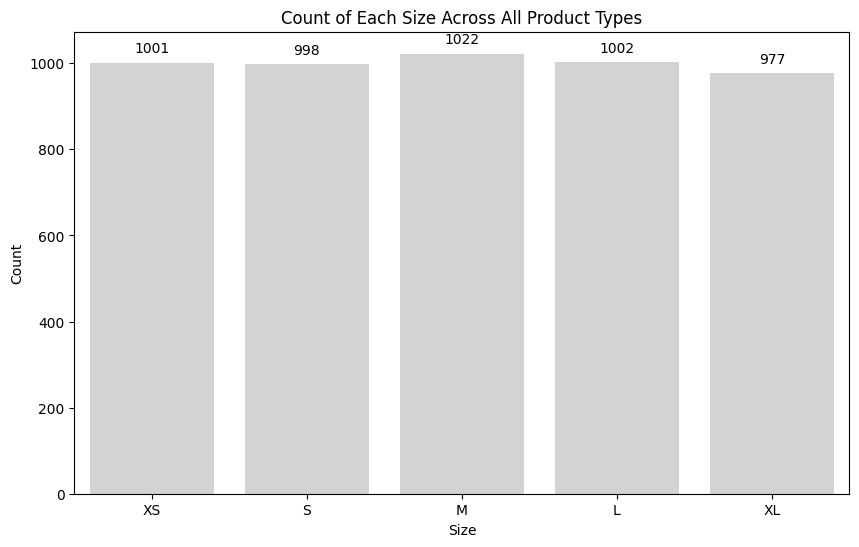

In [ ]:
size_order = ['XS', 'S', 'M', 'L', 'XL']

# Create a count plot for all sizes with lightgray color
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='size', data=merged_df_2, color='lightgray', order=size_order)

# Add count labels on each bar (whole numbers)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Count of Each Size Across All Product Types')

plt.show()


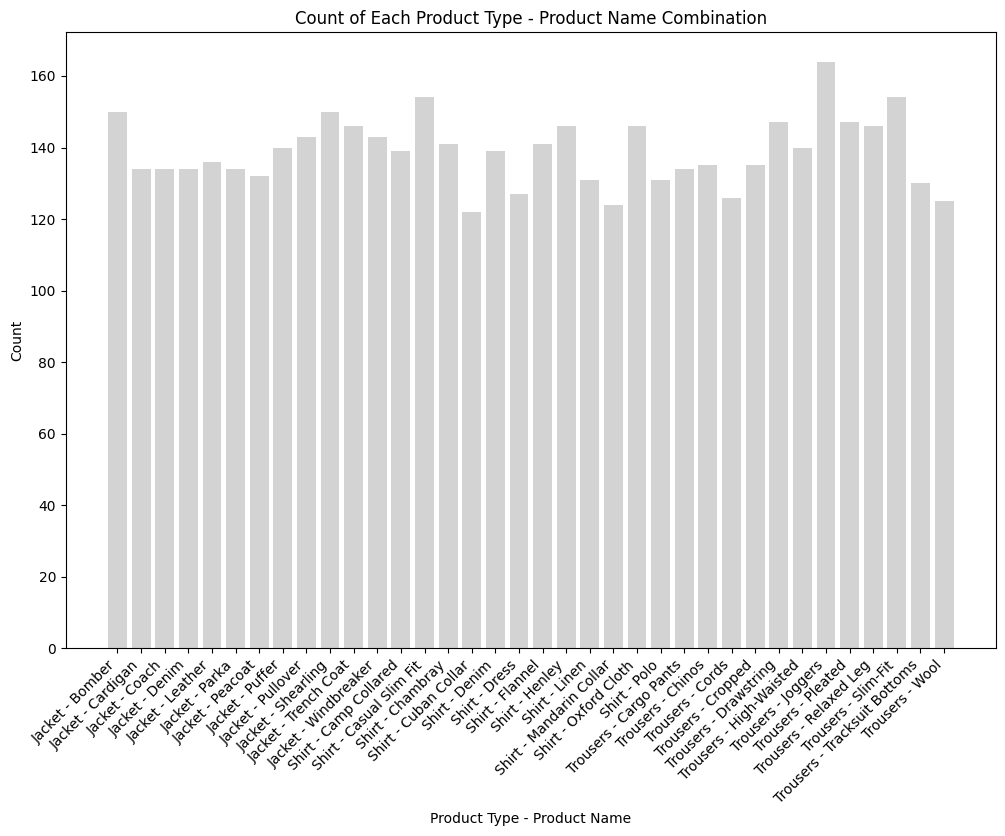

In [ ]:
product_counts = merged_df_2.groupby(['product_type', 'product_name']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
plt.bar(product_counts['product_type'] + ' - ' + product_counts['product_name'], product_counts['count'], color='lightgray')

plt.xlabel('Product Type - Product Name')
plt.ylabel('Count')
plt.title('Count of Each Product Type - Product Name Combination')

plt.xticks(rotation=45, ha='right')

plt.show()


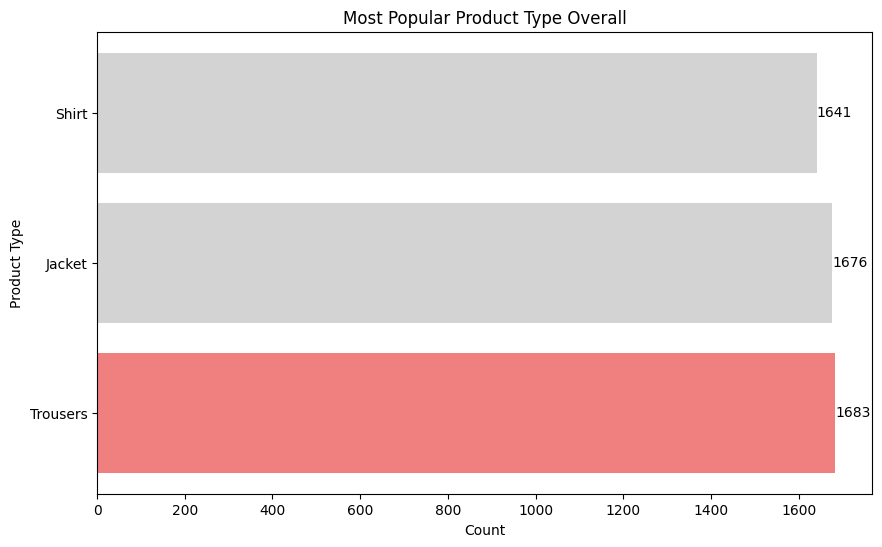

In [ ]:
# Count occurrences of each product type overall
overall_product_type_counts = merged_df_2['product_type'].value_counts()

# Determine the color for each product type
colors = ['lightcoral' if product_type == overall_product_type_counts.idxmax() else 'lightgray' for product_type in overall_product_type_counts.index]

# Plot the count of each product type as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(overall_product_type_counts.index, overall_product_type_counts, color=colors)
plt.ylabel('Product Type')
plt.xlabel('Count')
plt.title('Most Popular Product Type Overall')

# Add labels on each bar
for i, count in enumerate(overall_product_type_counts):
    plt.text(count + 0.1, i, str(count), va='center')

plt.show()


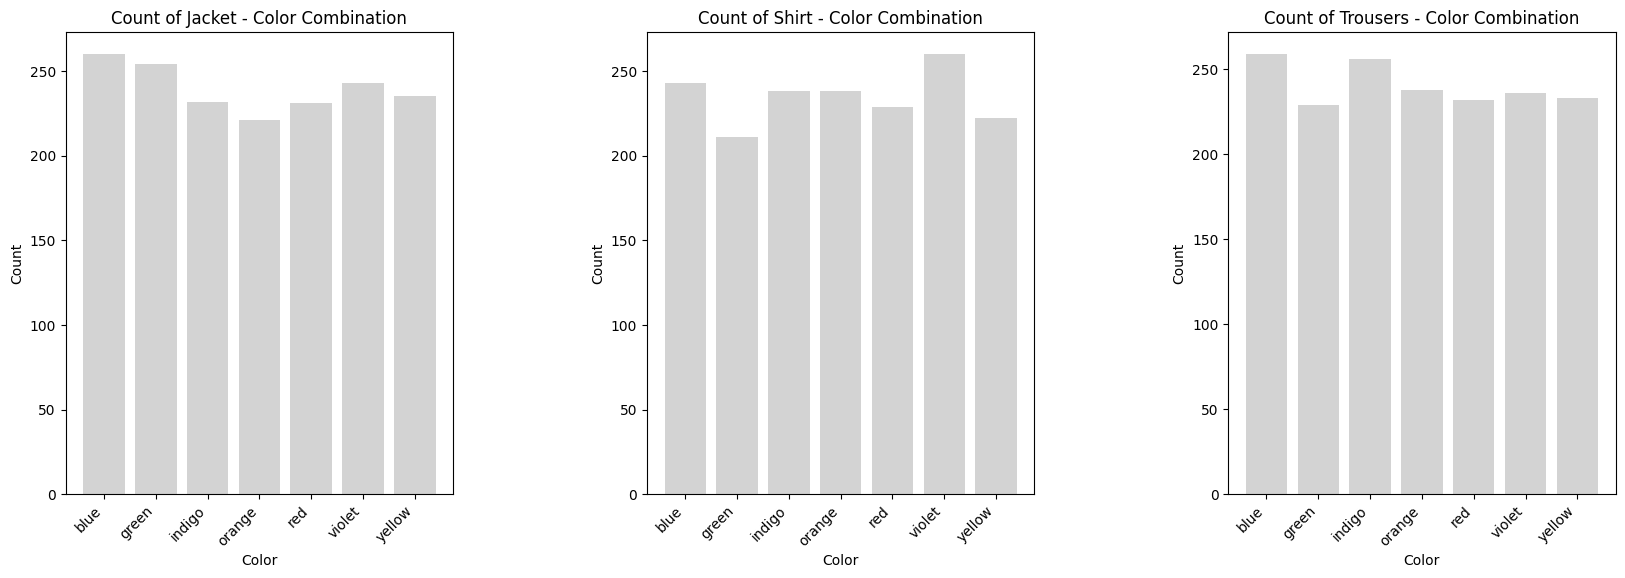

In [ ]:
# Filter data for product name and color
jacket_data = merged_df_2[merged_df_2['product_type'] == 'Jacket']
shirt_data = merged_df_2[merged_df_2['product_type'] == 'Shirt']
trousers_data = merged_df_2[merged_df_2['product_type'] == 'Trousers']

# Function to plot bar chart for a given product type
def plot_product_type(data, product_type, position):
    plt.bar(data['colour'], data['count'], color='lightgray')
    plt.xlabel('Color')
    plt.ylabel('Count')
    plt.title(f'Count of {product_type} - Color Combination')
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(wspace=0.5)  # Adjust space between subplots

# Group by 'colour' and count occurrences for each product type
jacket_counts = jacket_data.groupby('colour').size().reset_index(name='count')
shirt_counts = shirt_data.groupby('colour').size().reset_index(name='count')
trousers_counts = trousers_data.groupby('colour').size().reset_index(name='count')

# Plot in one row
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)  # Jacket plot
plot_product_type(jacket_counts, 'Jacket', 1)

plt.subplot(1, 3, 2)  # Shirt plot
plot_product_type(shirt_counts, 'Shirt', 2)

plt.subplot(1, 3, 3)  # Trousers plot
plot_product_type(trousers_counts, 'Trousers', 3)

plt.show()


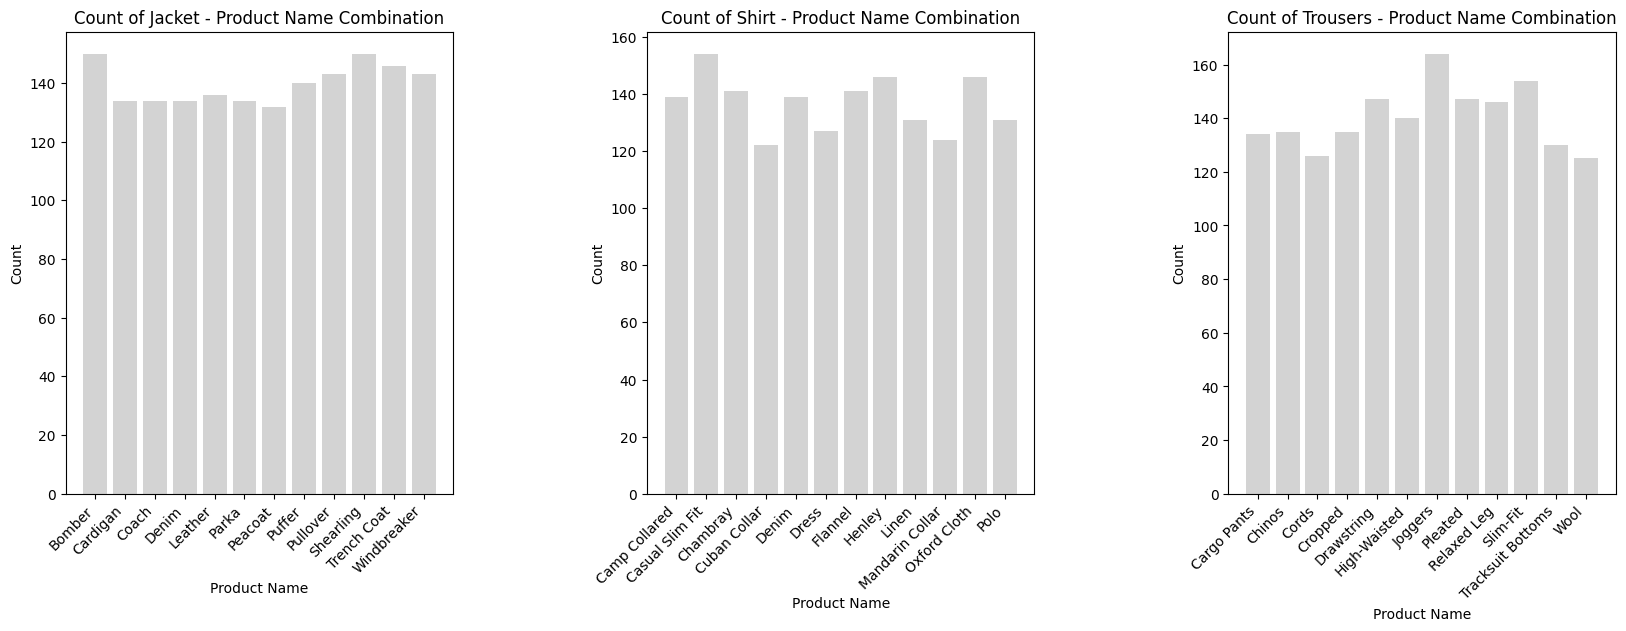

In [ ]:
# Filter data for each product type
jacket_data = merged_df_2[merged_df_2['product_type'] == 'Jacket']
shirt_data = merged_df_2[merged_df_2['product_type'] == 'Shirt']
trousers_data = merged_df_2[merged_df_2['product_type'] == 'Trousers']

# Function to plot bar chart for a given product type
def plot_product_type(data, product_type, position):
    plt.bar(data['product_name'], data['count'], color='lightgray')
    plt.xlabel('Product Name')
    plt.ylabel('Count')
    plt.title(f'Count of {product_type} - Product Name Combination')
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(wspace=0.5)  # Adjust space between subplots

# Group by 'product_name' and count occurrences for each product type
jacket_counts = jacket_data.groupby('product_name').size().reset_index(name='count')
shirt_counts = shirt_data.groupby('product_name').size().reset_index(name='count')
trousers_counts = trousers_data.groupby('product_name').size().reset_index(name='count')

# Plot in one row
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)  # Jacket plot
plot_product_type(jacket_counts, 'Jacket', 1)

plt.subplot(1, 3, 2)  # Shirt plot
plot_product_type(shirt_counts, 'Shirt', 2)

plt.subplot(1, 3, 3)  # Trousers plot
plot_product_type(trousers_counts, 'Trousers', 3)

plt.show()


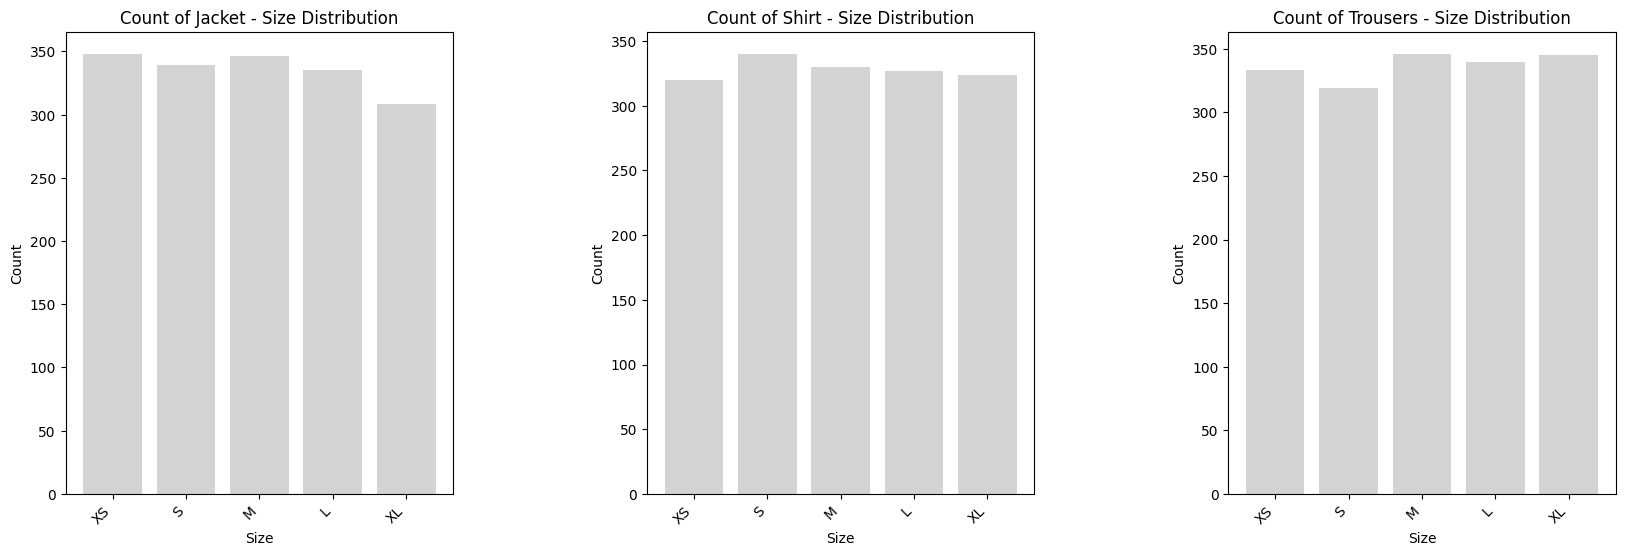

In [ ]:
# Filter data for each product type and size
jacket_data = merged_df_2[merged_df_2['product_type'] == 'Jacket']
shirt_data = merged_df_2[merged_df_2['product_type'] == 'Shirt']
trousers_data = merged_df_2[merged_df_2['product_type'] == 'Trousers']

# Function to plot bar chart for a given product type
def plot_product_type(data, product_type, position):
    # Sort data by 'size' column
    data = data.sort_values(by='size', key=lambda x: x.map({'XS': 0, 'S': 1, 'M': 2, 'L': 3, 'XL': 4}))

    plt.bar(data['size'], data['count'], color='lightgray')
    plt.xlabel('Size')
    plt.ylabel('Count')
    plt.title(f'Count of {product_type} - Size Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(wspace=0.5)  # Adjust space between subplots

# Group by 'size' and count occurrences for each product type
jacket_counts = jacket_data.groupby('size').size().reset_index(name='count')
shirt_counts = shirt_data.groupby('size').size().reset_index(name='count')
trousers_counts = trousers_data.groupby('size').size().reset_index(name='count')

# Plot in one row
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)  # Jacket plot
plot_product_type(jacket_counts, 'Jacket', 1)

plt.subplot(1, 3, 2)  # Shirt plot
plot_product_type(shirt_counts, 'Shirt', 2)

plt.subplot(1, 3, 3)  # Trousers plot
plot_product_type(trousers_counts, 'Trousers', 3)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named customer_analysis

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_analysis[['product_name', 'age']])

# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()


KeyError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named customer_analysis

# Feature Scaling
scaler = StandardScaler()
label_encoder = LabelEncoder()
merged_df_2['xx'] = label_encoder.fit_transform(merged_df_2['product_name'])

scaled_data = scaler.fit_transform(merged_df_2[['xx', 'age']])

# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

NameError: ignored

# Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

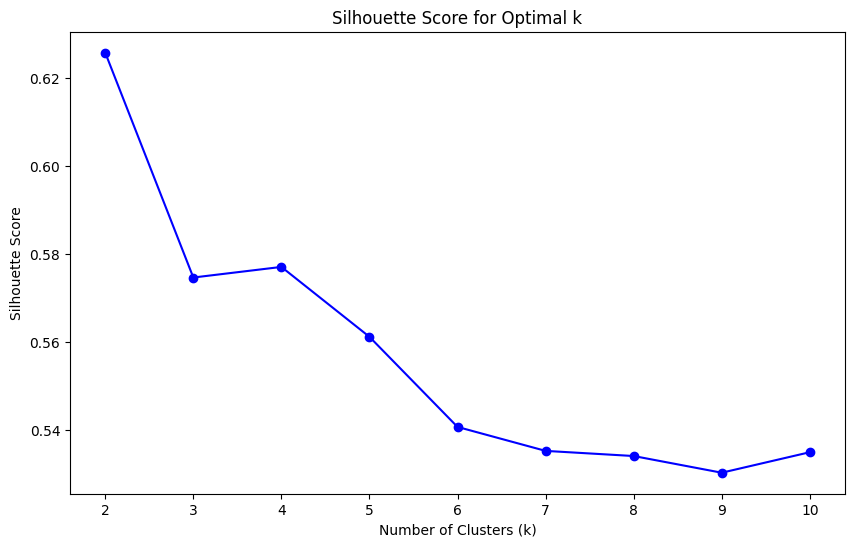

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming X is your feature matrix
X = customer_analysis[['Age', 'TotalSpending']]

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
X=customer_analysis[['Age','TotalSpending']]

model=KMeans(n_clusters=3,init='k-means++')
y_pred=model.fit_predict(X)
print(f'Cluster Centers\n{model.cluster_centers_}')


Cluster Centers
[[  49.67845659  881.5562701 ]
 [  49.24778761 2030.94690265]
 [  48.29113924 3780.27848101]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


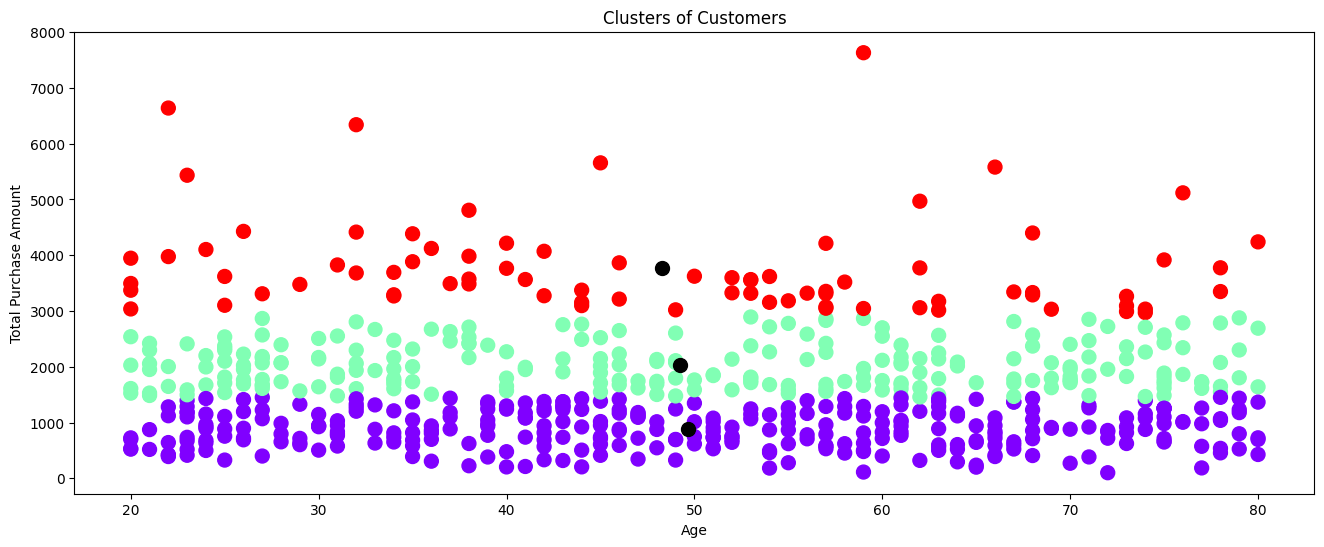

In [ ]:
plt.figure(figsize=(16,6))
plt.scatter(X['Age'],X['TotalSpending'],s=100,c=model.labels_,cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Total Purchase Amount')
plt.show()

In [ ]:
customer_analysis

,CustomerID,TotalSpending,MostPurchasedProduct,AveragePrice,TotalItemsBought,Gender,Age,AgeRange
0,1,1641,Jacket,112.125000,17,Female,30,30-40
1,7,1017,Trousers,101.800000,9,Bigender,76,70-80
2,10,270,Trousers,95.000000,3,Bigender,70,70-80
3,11,382,Shirt,103.000000,4,Agender,39,30-40
4,12,1551,Jacket,108.000000,15,Bigender,78,70-80
...,...,...,...,...,...,...,...,...
611,994,1716,Shirt,111.285714,17,Female,53,50-60
612,995,2140,Shirt,110.800000,21,Polygender,63,60-70
613,996,3045,Jacket,106.307692,29,Agender,59,50-60
614,998,4415,Jacket,104.904762,42,Polygender,32,30-40


<ipython-input-57-1df0999a5158>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['MostPurchasedProductEncoded'] = label_encoder.fit_transform(c1['MostPurchasedProduct'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers
[[68.86046512  0.93953488]
 [28.64102564  0.97948718]
 [48.56796117  1.02427184]]


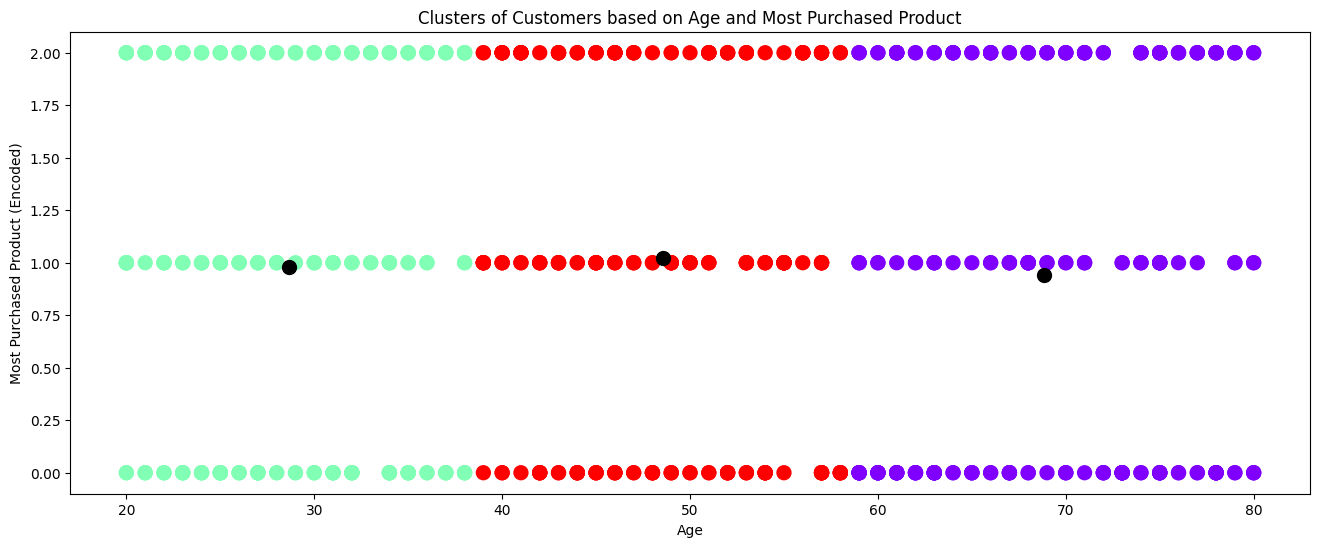

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'Age' and 'MostPurchasedProduct' are columns in your DataFrame customer_analysis
c1 = customer_analysis[['Age', 'MostPurchasedProduct']]

# Use label encoding for 'MostPurchasedProduct'
label_encoder = LabelEncoder()
c1['MostPurchasedProductEncoded'] = label_encoder.fit_transform(c1['MostPurchasedProduct'])

# Use 'Age' and 'MostPurchasedProductEncoded' for clustering
X = c1[['Age', 'MostPurchasedProductEncoded']]

model = KMeans(n_clusters=3, init='k-means++')
y_pred = model.fit_predict(X)
print(f'Cluster Centers\n{model.cluster_centers_}')

plt.figure(figsize=(16, 6))
plt.scatter(c1['Age'], c1['MostPurchasedProductEncoded'], s=100, c=model.labels_, cmap='rainbow')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, color='black')
plt.title('Clusters of Customers based on Age and Most Purchased Product')
plt.xlabel('Age')
plt.ylabel('Most Purchased Product (Encoded)')
plt.show()


In [ ]:
c1 = merged_df_2.head()
c1


,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,product_name,size,colour,price,quantity_y,description,year_order,month_order,day_order,day_of_week
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,455,...,Chambray,S,red,105,72,"A red coloured, S sized, Chambray Shirt",2021,4,4,Sunday
1,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,455,...,Pullover,L,yellow,114,43,"A yellow coloured, L sized, Pullover Jacket",2021,4,4,Sunday
2,81,Lanny Wardale,Female,30,4870 Jackson SummitApt. 538,1915,Spencerborough,Western Australia,Australia,863,...,Pullover,L,yellow,114,43,"A yellow coloured, L sized, Pullover Jacket",2021,5,10,Monday
3,258,Mira Heinonen,Female,62,2719 Dietrich KnollApt. 175,1252,South Declan,Queensland,Australia,793,...,Pullover,L,yellow,114,43,"A yellow coloured, L sized, Pullover Jacket",2021,1,27,Wednesday
4,432,Ettie Gonnely,Bigender,34,6172 Andrew AvenueApt. 194,7029,North Cody,Victoria,Australia,939,...,Pullover,L,yellow,114,43,"A yellow coloured, L sized, Pullover Jacket",2021,4,2,Friday


<ipython-input-61-596cabaef257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['xx'] = label_encoder.fit_transform(X['product_name'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

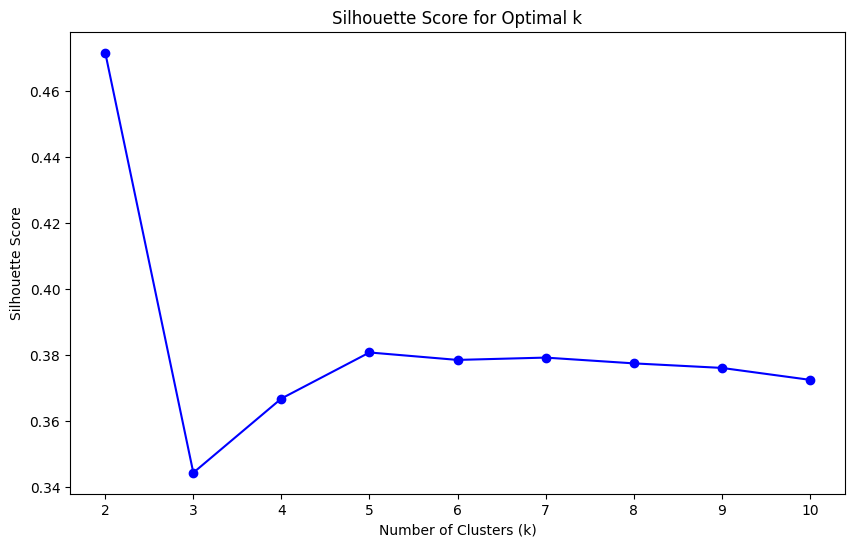

In [ ]:
# Assuming X is your feature matrix
X = merged_df_2[['age', 'product_name']]
label_encoder = LabelEncoder()
X['xx'] = label_encoder.fit_transform(X['product_name'])

# Use 'age' and 'xx' for clustering
X = X[['age', 'xx']]

silhouette_scores = []
for k in range(2, min(11, len(X) - 1)):  # Adjust the range based on the number of samples
    kmeans = KMeans(n_clusters=k, init='k-means++')
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, min(11, len(X) - 1)), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


<ipython-input-62-7f3f945a9646>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['MostPurchasedProductEncoded'] = label_encoder.fit_transform(c1['product_name'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers
[[64.59900374 16.92320465]
 [34.03434967 16.85179467]]


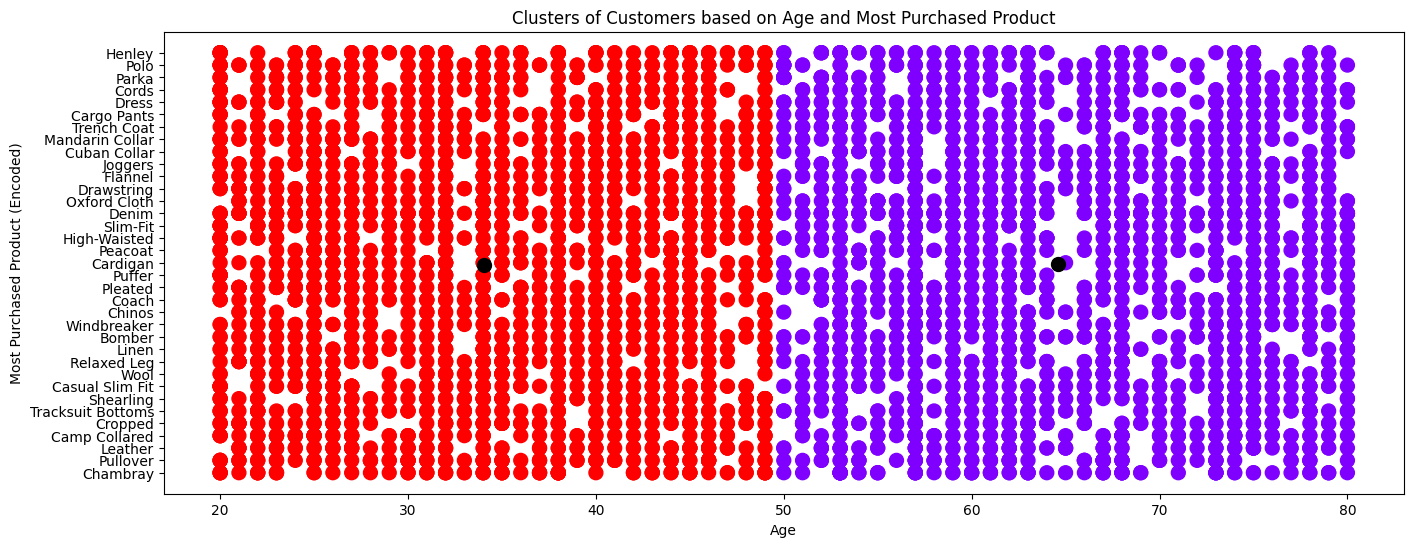

In [ ]:
# Assuming 'Age' and 'MostPurchasedProduct' are columns in your DataFrame customer_analysis
c1 = merged_df_2[['age', 'product_name']]

# Use label encoding for 'MostPurchasedProduct'
label_encoder = LabelEncoder()
c1['MostPurchasedProductEncoded'] = label_encoder.fit_transform(c1['product_name'])

# Use 'Age' and 'MostPurchasedProductEncoded' for clustering
X = c1[['age', 'MostPurchasedProductEncoded']]

model = KMeans(n_clusters=2, init='k-means++')
y_pred = model.fit_predict(X)
print(f'Cluster Centers\n{model.cluster_centers_}')

plt.figure(figsize=(16, 6))
plt.scatter(c1['age'], c1['product_name'], s=100, c=model.labels_, cmap='rainbow')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, color='black')
plt.title('Clusters of Customers based on Age and Most Purchased Product')
plt.xlabel('Age')
plt.ylabel('Most Purchased Product (Encoded)')
plt.show()


In [ ]:
pip install mlxtend


# Association rule

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming your merged dataframe is named merged_df_2
# Extract relevant columns for association analysis
association_data = merged_df_2[['customer_id', 'product_name']]

# Group products by customer_id
transactions = association_data.groupby('customer_id')['product_name'].apply(list).tolist()

# Perform one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori algorithm
min_support = 0.01  # Adjust this value based on your dataset
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
       support                                           itemsets
0     0.215909                                           (Bomber)
1     0.207792                                    (Camp Collared)
2     0.183442                                         (Cardigan)
3     0.191558                                      (Cargo Pants)
4     0.222403                                  (Casual Slim Fit)
...        ...                                                ...
6451  0.011364  (Denim, Slim-Fit, Puffer, Linen, Mandarin Collar)
6452  0.011364  (Denim, Slim-Fit, Linen, Trench Coat, Oxford C...
6453  0.011364  (Denim, Slim-Fit, Puffer, Relaxed Leg, Mandari...
6454  0.011364  (Denim, Slim-Fit, Puffer, Trench Coat, Mandari...
6455  0.011364  (Slim-Fit, Linen, Trench Coat, Flannel, Oxford...

[6456 rows x 2 columns]

Association Rules:
                                        antecedents               consequents  \
0              (Camp Collared, Trench Coat, Bomber)            

In [ ]:
frequent_itemsets


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.215909,(Bomber)
1,0.207792,(Camp Collared)
2,0.183442,(Cardigan)
3,0.191558,(Cargo Pants)
4,0.222403,(Casual Slim Fit)
...,...,...
6451,0.011364,"(Denim, Slim-Fit, Puffer, Linen, Mandarin Collar)"
6452,0.011364,"(Denim, Slim-Fit, Linen, Trench Coat, Oxford C..."
6453,0.011364,"(Denim, Slim-Fit, Puffer, Relaxed Leg, Mandari..."
6454,0.011364,"(Denim, Slim-Fit, Puffer, Trench Coat, Mandari..."


In [ ]:
pip install xlsxwriter


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
excel_writer = pd.ExcelWriter('association_results.xlsx', engine='xlsxwriter')
frequent_itemsets.to_excel(excel_writer, sheet_name='Frequent_Itemsets', index=False)
rules.to_excel(excel_writer, sheet_name='Association_Rules', index=False)
excel_writer.save()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-74-9984da568fc6>:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()


In [ ]:
# Calculate confidence for the specific rule
support_linen_and_others = frequent_itemsets[
    frequent_itemsets['itemsets'] == frozenset({'Linen', 'Camp Collared', 'Trench Coat', 'Bomber'})
]['support'].values[0]

support_linen = frequent_itemsets[frequent_itemsets['itemsets'] == frozenset({'Linen'})]['support'].values[0]

confidence = support_linen_and_others / support_linen

print("Calculated Confidence:")
print(confidence)


Calculated Confidence:
0.07692307692307693


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate confidence for the specified rule
support_clothing_combination = frequent_itemsets[
    frequent_itemsets['itemsets'] == frozenset({'Camp Collared', 'Trench Coat', 'Bomber', 'Linen'})
]['support'].values[0]

support_clothing = frequent_itemsets[
    frequent_itemsets['itemsets'] == frozenset({'Camp Collared', 'Trench Coat', 'Bomber'})
]['support'].values[0]

confidence_clothing_to_linen = support_clothing_combination / support_clothing

print("Calculated Confidence:")
print(confidence_clothing_to_linen)


Calculated Confidence:
0.75


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_confidence = rules.nlargest(10, 'confidence')
top_lift = rules.nlargest(10, 'lift')
print("\nTop 20 Association Rules by Confidence:")
print(top_confidence)

print("\nTop 20 Association Rules by Lift:")
print(top_lift)


Top 20 Association Rules by Confidence:
                                    antecedents        consequents  \
29606      (Camp Collared, Windbreaker, Bomber)         (Slim-Fit)   
30444            (Peacoat, Drawstring, Cropped)           (Bomber)   
30796          (Pullover, Cuban Collar, Bomber)            (Linen)   
32393  (Camp Collared, Puffer, Mandarin Collar)            (Denim)   
33274             (Cropped, Slim-Fit, Cardigan)      (Trench Coat)   
33667             (Trench Coat, Wool, Cardigan)            (Denim)   
35261      (Cords, Drawstring, Casual Slim Fit)  (Mandarin Collar)   
35274            (Cords, Flannel, Oxford Cloth)  (Casual Slim Fit)   
36438           (Puffer, Polo, Casual Slim Fit)           (Henley)   
37809       (Windbreaker, Chinos, Oxford Cloth)         (Slim-Fit)   

       antecedent support  consequent support   support  confidence      lift  \
29606            0.011364            0.219156  0.011364         1.0  4.562963   
30444            0.011364 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_confidence

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29606,"(Camp Collared, Windbreaker, Bomber)",(Slim-Fit),0.011364,0.219156,0.011364,1.0,4.562963,0.008873,inf,0.789819
30444,"(Peacoat, Drawstring, Cropped)",(Bomber),0.011364,0.215909,0.011364,1.0,4.631579,0.008910,inf,0.793103
30796,"(Pullover, Cuban Collar, Bomber)",(Linen),0.011364,0.189935,0.011364,1.0,5.264957,0.009205,inf,0.819376
32393,"(Camp Collared, Puffer, Mandarin Collar)",(Denim),0.014610,0.345779,0.014610,1.0,2.892019,0.009558,inf,0.663921
33274,"(Cropped, Slim-Fit, Cardigan)",(Trench Coat),0.011364,0.196429,0.011364,1.0,5.090909,0.009131,inf,0.812808
33667,"(Trench Coat, Wool, Cardigan)",(Denim),0.011364,0.345779,0.011364,1.0,2.892019,0.007434,inf,0.661741
35261,"(Cords, Drawstring, Casual Slim Fit)",(Mandarin Collar),0.012987,0.181818,0.012987,1.0,5.500000,0.010626,inf,0.828947
35274,"(Cords, Flannel, Oxford Cloth)",(Casual Slim Fit),0.011364,0.222403,0.011364,1.0,4.496350,0.008836,inf,0.786535
36438,"(Puffer, Polo, Casual Slim Fit)",(Henley),0.014610,0.214286,0.014610,1.0,4.666667,0.011480,inf,0.797364
37809,"(Windbreaker, Chinos, Oxford Cloth)",(Slim-Fit),0.012987,0.219156,0.012987,1.0,4.562963,0.010141,inf,0.791118


In [ ]:
top_lift

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
45140,"(Puffer, Polo, Casual Slim Fit)","(Slim-Fit, Henley)",0.014610,0.055195,0.011364,0.777778,14.091503,0.010557,4.251623,0.942810
45141,"(Slim-Fit, Henley)","(Puffer, Polo, Casual Slim Fit)",0.055195,0.014610,0.011364,0.205882,14.091503,0.010557,1.240861,0.983309
45131,"(Slim-Fit, Henley, Polo)","(Puffer, Casual Slim Fit)",0.016234,0.050325,0.011364,0.700000,13.909677,0.010547,3.165584,0.943423
45150,"(Puffer, Casual Slim Fit)","(Slim-Fit, Henley, Polo)",0.050325,0.016234,0.011364,0.225806,13.909677,0.010547,1.270698,0.977289
44816,"(Linen, Slim-Fit)","(Trench Coat, Bomber, Pleated)",0.063312,0.016234,0.012987,0.205128,12.635897,0.011959,1.237641,0.983102
44818,"(Linen, Bomber)","(Trench Coat, Slim-Fit, Pleated)",0.063312,0.016234,0.012987,0.205128,12.635897,0.011959,1.237641,0.983102
44803,"(Trench Coat, Slim-Fit, Pleated)","(Linen, Bomber)",0.016234,0.063312,0.012987,0.800000,12.635897,0.011959,4.683442,0.936056
44805,"(Trench Coat, Bomber, Pleated)","(Linen, Slim-Fit)",0.016234,0.063312,0.012987,0.800000,12.635897,0.011959,4.683442,0.936056
45527,"(Linen, Trench Coat, Flannel)","(Slim-Fit, Oxford Cloth)",0.016234,0.056818,0.011364,0.700000,12.320000,0.010441,3.143939,0.933993
45534,"(Slim-Fit, Oxford Cloth)","(Linen, Trench Coat, Flannel)",0.056818,0.016234,0.011364,0.200000,12.320000,0.010441,1.229708,0.974182
